In [44]:
import re
import requests
import pickle
import spacy
import httplib2
from urllib.request import urlopen
from bs4 import BeautifulSoup, SoupStrainer
from newspaper import Article
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
response = requests.get(url='https://www.foxnews.com/sitemap.xml?type=news')
soup=BeautifulSoup(response.content)
aa = soup.find('url')
test_url = str(aa.find('loc'))[5:-6]
print(test_url)

https://www.foxnews.com/us/washington-sheriffs-deputy-stabbed-in-head-while-trying-to-arrest-rape-suspect


In [4]:
article = Article(test_url)
article.download()
article.parse()
text=article.text

In [43]:
http = httplib2.Http()
status, response = http.request('https://www.foxnews.com/sports')

extensions = []
for link in BeautifulSoup(response,'html.parser', parse_only=SoupStrainer('a')):
    if link.has_attr('href'):
        if str(link['href'])[0:1] == '/':
            extensions.append(str(link['href']))
fullFoxArticles = []
for linkExtension in extensions:
    url = 'https://www.foxnews.com' + linkExtension
    article = Article(url)
    article.download()
    article.parse()
    text=article.text
    fullFoxArticles.append(text)

In [45]:
print(len(fullFoxArticles))


225


In [40]:
http = httplib2.Http()
status, response = http.request('https://abcnews.go.com/Sports/Olympics')

urls = []
for link in BeautifulSoup(response,'html.parser', parse_only=SoupStrainer('a')):
    if link.has_attr('href'):
        if '/GMA/' in str(link['href']) or '/Sports/' in str(link['href']):
            if str(link['href']) not in urls and str(link['href']) != '/Sports/Olympics':
                urls.append(str(link['href']))

status, response = http.request('https://abcnews.go.com/Sports')

for link in BeautifulSoup(response,'html.parser', parse_only=SoupStrainer('a')):
    if link.has_attr('href'):
        if '/GMA/' in str(link['href']) or '/Sports/' in str(link['href']):
            if str(link['href']) not in urls and str(link['href']) != '/Sports/Olympics':
                urls.append(str(link['href']))
                
status, response = http.request('https://abcnews.go.com/Health')

for link in BeautifulSoup(response,'html.parser', parse_only=SoupStrainer('a')):
    if link.has_attr('href'):
        if '.com/Health/' in str(link['href']):
            if str(link['href']) not in urls:
                urls.append(str(link['href']))
       
       
fullABCArticles = []
for link in urls:
    article = Article(link)
    article.download()
    article.parse()
    text=article.text
    fullABCArticles.append(text)

In [42]:
print(len(fullABCArticles))

141


In [46]:
pipe = spacy.load('en_core_web_sm')
all_stopwords = pipe.Defaults.stop_words
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~–'''

nonStopWordsFox = {}
for article in fullFoxArticles:
    text = pipe(article)
    for token in text:
        if token.lemma_ not in all_stopwords and token.text not in punc:
            nonStopWordsFox[token.lemma_] = nonStopWordsFox.get(token.lemma_, 0) + 1
            

nonStopWordsABC = {}
for article in fullABCArticles:
    text = pipe(article)
    for token in text:
        if token.lemma_ not in all_stopwords and token.text not in punc:
            nonStopWordsABC[token.lemma_] = nonStopWordsABC.get(token.lemma_, 0) + 1
            

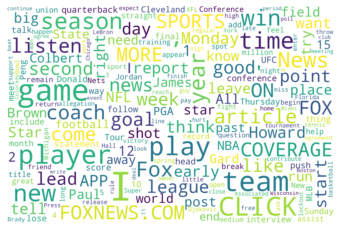

In [50]:
# Define a function to plot word cloud
def plot_cloud(wordcloud,name):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off")
    plt.show()
    plt.savefig(name)

# Generate word cloud
wcFox = WordCloud(background_color="white",width=3000,height=2000, relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(nonStopWordsFox)
plt.imshow(wcFox, interpolation='bilinear')
plt.axis("off")
plt.show()
wcFox.to_file('wordCloudFox.png')

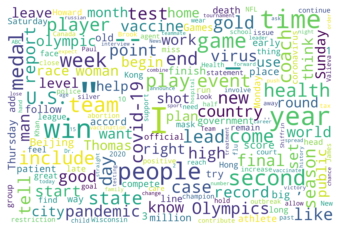

In [51]:
wcABC = WordCloud(background_color="white",width=3000,height=2000, relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(nonStopWordsABC)
plt.imshow(wcABC, interpolation='bilinear')
plt.axis("off")
plt.show()
wcABC.to_file('wordCloudABC.png')